<a href="https://colab.research.google.com/github/gsangf10/Analysis_Algorithm/blob/main/Analysis_%EB%AC%B8%EC%A0%9C_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Set 특성 설명

In [ ]:
# 데이터 설명
# id: 일련번호
# name: AirBnB 이름
# host_id: 호스트 ID
# host_name: 호스트 성명 
# neighbourhood_group: 지구명
# neighbourhood : 지역명
# latitude: 위도
# longitude: 경도
# room_type: 방 타입
# price: 가격  
# minimum_nights: 최소 숙박일수  
# number_of_reviews: 리뷰 개수
# last_review: 최근 리뷰 일자
# reviews_per_month: 월 평균 리뷰 수
# calculated_host_listings_count:  호스트에게 대여 가능한 에어비앤비의 총 개수
# availability_365: 1년 중 가능한 대여일

# 판다스로 데이터 읽어오기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/Big_Data/dataset/AB_NYC_2019.csv')
df.head()
df.info()
# df['id'].unique().shape
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# 수치형 데이터와 price의 상관관계
- jointplot 활용

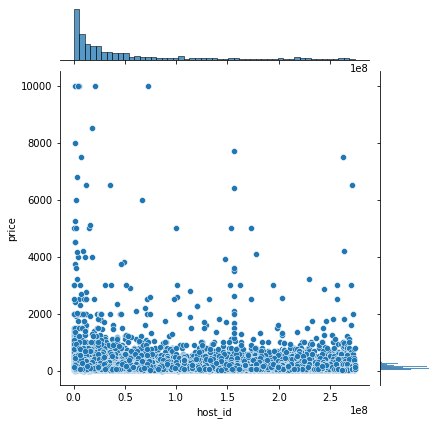

In [ ]:
sns.jointplot(x='host_id', y='price', data=df)

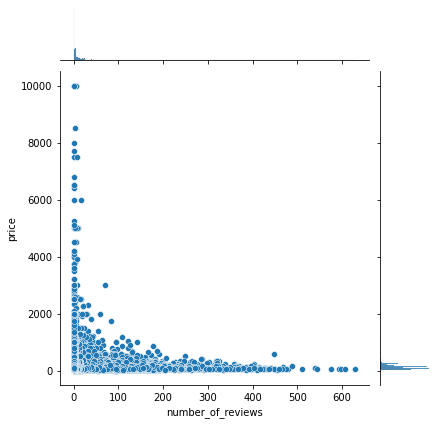

In [ ]:
sns.jointplot(x='number_of_reviews', y='price', data=df)

# 범주형 데이터와 price의 상관관계

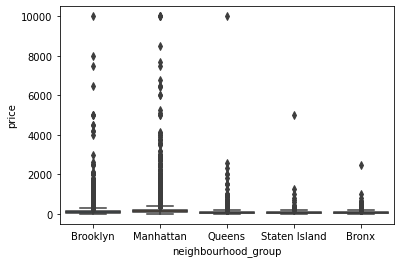

In [ ]:
df['neighbourhood_group'].unique().shape

sns.boxplot(x='neighbourhood_group', y='price', data=df)

# 불필요해 보이는 컬럼 삭제

In [ ]:
df = df.drop(['id', 'name', 'host_name', 'latitude', 'longitude'], axis=1)
df

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365
1,2845,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,4632,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1,365
3,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,NaN,NaN,2,9
48891,6570630,Brooklyn,Bushwick,Private room,40,4,0,NaN,NaN,2,36
48892,23492952,Manhattan,Harlem,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,30985759,Manhattan,Hell's Kitchen,Shared room,55,1,0,NaN,NaN,6,2


# 데이터 클리닝 진행 1
- 이상데이터(아웃라이어) 제거
- quantile함수와 rugplot() 활용

## price의 아웃라이어 제거

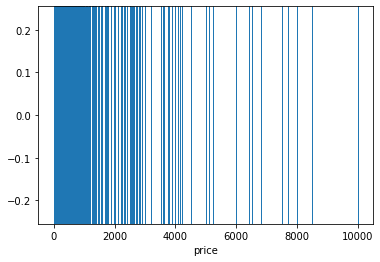

In [ ]:
# quantile 10등분한 값중 어느쯤에 위치하는지

arr = np.array(np.arange(11))

sr = pd.Series(arr)
sr.quantile(0.01) # 상위 1%

sns.rugplot(x='price', data=df, height=1)

df['price'].quantile(0.95)
df['price'].quantile(0.01)

max = df['price'].quantile(0.95)
min = df['price'].quantile(0.01)

df = df[(df['price'] > min) & (df['price'] < max)]

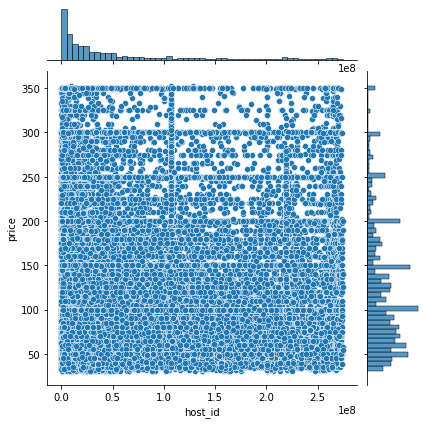

In [ ]:
sns.jointplot(x='host_id', y='price', data=df)

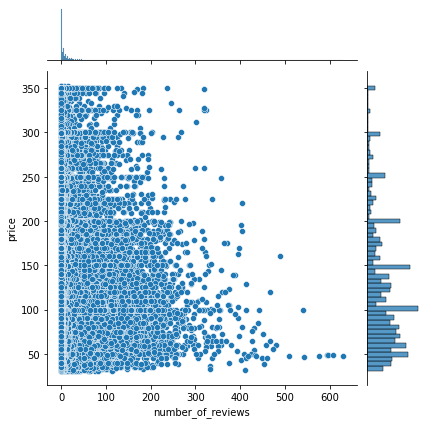

In [ ]:
sns.jointplot(x='number_of_reviews', y='price', data=df)

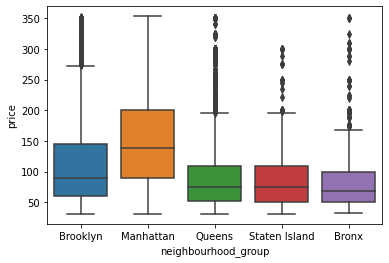

In [ ]:
sns.boxplot(x='neighbourhood_group', y='price', data=df)

## minimum_nights의 아웃라이어 제거

30.0 1.0


,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,4632,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1,365
4,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,7322,Manhattan,Murray Hill,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
7,8967,Manhattan,Hell's Kitchen,Private room,79,2,430,2019-06-24,3.47,1,220
8,7490,Manhattan,Upper West Side,Private room,79,2,118,2017-07-21,0.99,1,0
...,...,...,...,...,...,...,...,...,...,...,...
48888,274321313,Manhattan,Hell's Kitchen,Private room,125,4,0,NaN,NaN,1,31
48890,8232441,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,NaN,NaN,2,9
48891,6570630,Brooklyn,Bushwick,Private room,40,4,0,NaN,NaN,2,36
48892,23492952,Manhattan,Harlem,Entire home/apt,115,10,0,NaN,NaN,1,27


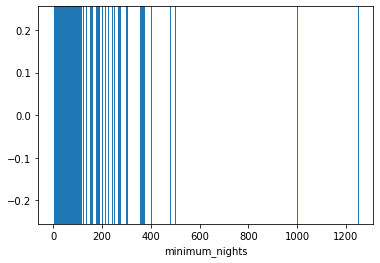

In [ ]:
sns.rugplot(x='minimum_nights', data=df, height=1)

max = df['minimum_nights'].quantile(0.95)
min = df['minimum_nights'].quantile(0.01)
print(max, min)

max = df['minimum_nights'].quantile(0.95)
min = df['minimum_nights'].quantile(0.01)

df = df[(df['minimum_nights'] > min) & (df['minimum_nights'] < max)]
df

# 데이터 클리닝 진행2
- 범주형 데이터 정리

## availability_365의 범주 이분화

In [ ]:
# availability_365의 경우 0이 너무 많으므로 범주형 데이터로 바꾸기

df['availability_365'].value_counts()

# 0은 의미를 가질수도 있고 갖지 않을 수도 있다. 숫자 데이터는 결측치로 0을 사용하는 경우가 많다.
# 결측치 처리는 어떻게 하는가?
# 결측치가 너무 많으면-> 결측치가 있는 행 제거
# 한열에 결측치가 너무 많으면 -> 열 자체를 제거
# 중앙값 넣기, 평균값 넣기
# 전부 0처리 -> 권장X
# 재가공

# availability_365의 경우데 0인 데이터가 너무 많으므로 데이터를 아예 크게 0인것과 0이 아닌 범주형 데이터로 바꾸어 사용하는 방법을 사용한다.

# availability_365 컬럼에서 값이 0인 것을 찾아 zerotype으로 바꿈
dfc = df.copy()
dfc.loc[dfc['availability_365'] == 0, 'availability_365'] = 'zerotype'
dfc.loc[dfc['availability_365'] != 'zerotype', 'availability_365'] = 'nonzero'
dfc['availability_365'].unique()

array(['nonzero', 'zerotype'], dtype=object)

## last_review 날짜의 월까지만 표기

In [ ]:
dfc.loc[dfc['last_review'].isna(), 'last_review']
dfc.loc[dfc['last_review'].notna(), 'last_review'] = dfc.loc[dfc['last_review'].notna(), 'last_review'].str.slice(start=0, stop=7)
dfc['last_review'].unique()
# dfc['last_review'].value_counts()

array([nan, '2018-11', '2019-06', '2017-07', '2019-07', '2011-12',
       '2017-08', '2019-04', '2019-05', '2018-09', '2017-01', '2019-03',
       '2017-09', '2018-05', '2019-01', '2018-08', '2018-07', '2018-10',
       '2012-11', '2017-12', '2015-12', '2018-06', '2016-04', '2011-09',
       '2013-05', '2017-05', '2018-12', '2011-04', '2016-09', '2015-11',
       '2016-07', '2012-09', '2015-07', '2017-11', '2015-10', '2014-01',
       '2016-08', '2019-02', '2016-11', '2012-08', '2011-03', '2016-02',
       '2016-03', '2011-05', '2012-01', '2018-01', '2015-09', '2013-01',
       '2016-05', '2016-06', '2014-11', '2014-06', '2015-03', '2014-08',
       '2015-08', '2016-01', '2017-04', '2014-04', '2017-06', '2015-06',
       '2016-12', '2018-04', '2018-02', '2017-10', '2013-07', '2014-10',
       '2016-10', '2015-05', '2015-01', '2012-10', '2013-09', '2014-09',
       '2014-03', '2013-04', '2013-11', '2018-03', '2012-05', '2017-02',
       '2014-05', '2012-12', '2017-03', '2013-03', '2012-

# 미기입/오기입 데이터 처리

In [ ]:
# 새 컬럼을 만들어 새로운 데이터 유형으로 재가공
# reviews_per_month, review_count는 같은 의미를 가진 결측치이므로 이 둘을 반영하기 위해 리뷰 있음/없음으로 재가공

# 결측치 확인 -> isna()

def set_review_yn(flag):
  if flag == True:
    return 'No'
  return 'Yes'

dfc['review_yn'] = dfc['reviews_per_month'].isna().apply(set_review_yn)
dfc

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,review_yn
2,4632,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1,nonzero,No
4,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11,0.10,1,zerotype,Yes
5,7322,Manhattan,Murray Hill,Entire home/apt,200,3,74,2019-06,0.59,1,nonzero,Yes
7,8967,Manhattan,Hell's Kitchen,Private room,79,2,430,2019-06,3.47,1,nonzero,Yes
8,7490,Manhattan,Upper West Side,Private room,79,2,118,2017-07,0.99,1,zerotype,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
48888,274321313,Manhattan,Hell's Kitchen,Private room,125,4,0,NaN,NaN,1,nonzero,No
48890,8232441,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,NaN,NaN,2,nonzero,No
48891,6570630,Brooklyn,Bushwick,Private room,40,4,0,NaN,NaN,2,nonzero,No
48892,23492952,Manhattan,Harlem,Entire home/apt,115,10,0,NaN,NaN,1,nonzero,No


# 결측치 채우기
- fillna 함수 활용

In [ ]:
dfc = dfc.fillna(0)
dfc

# last_review 컬럼은 결측치를 문자열로 변환
dfc.loc[dfc['last_review'] == 0, 'last_review'] = '0'
dfc

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,review_yn
2,4632,Manhattan,Harlem,Private room,150,3,0,0,0.00,1,nonzero,No
4,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11,0.10,1,zerotype,Yes
5,7322,Manhattan,Murray Hill,Entire home/apt,200,3,74,2019-06,0.59,1,nonzero,Yes
7,8967,Manhattan,Hell's Kitchen,Private room,79,2,430,2019-06,3.47,1,nonzero,Yes
8,7490,Manhattan,Upper West Side,Private room,79,2,118,2017-07,0.99,1,zerotype,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
48888,274321313,Manhattan,Hell's Kitchen,Private room,125,4,0,0,0.00,1,nonzero,No
48890,8232441,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,0,0.00,2,nonzero,No
48891,6570630,Brooklyn,Bushwick,Private room,40,4,0,0,0.00,2,nonzero,No
48892,23492952,Manhattan,Harlem,Entire home/apt,115,10,0,0,0.00,1,nonzero,No


# 너무 많은 범주 정리하기

In [ ]:
neighbour_list = dfc['neighbourhood'].value_counts()[:70]

def change_neighbour_name(name):
  if name not in neighbour_list:
    return 'others'
  return name

dfc['neighbourhood'] = dfc['neighbourhood'].apply(change_neighbour_name)
dfc['neighbourhood'].unique()

array(['Harlem', 'East Harlem', 'Murray Hill', "Hell's Kitchen",
       'Upper West Side', 'South Slope', 'Williamsburg', 'Fort Greene',
       'Crown Heights', 'Park Slope', 'Bedford-Stuyvesant', 'Inwood',
       'East Village', 'Greenpoint', 'Bushwick',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'Lower East Side', 'Upper East Side', 'Clinton Hill',
       'Washington Heights', 'Chelsea', 'Flatbush', 'Prospect Heights',
       'Carroll Gardens', 'West Village', 'others', 'Cobble Hill',
       'Flushing', 'Gowanus', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Ditmars Steinway',
       'Windsor Terrace', 'Roosevelt Island', 'Chinatown',
       'Greenwich Village', 'Little Italy', 'East Flatbush', 'Astoria',
       'Boerum Hill', 'Brooklyn Heights', 'Midtown', 'Forest Hills',
       'Nolita', 'SoHo', 'East New York', 'Sunnyside', 'Sheepshead Bay',
       'Theater District', 'Tribeca', 'Sunset Park', 'Elmhurst',
       'Jack

# 데이터 전처리

## 범주형 데이터 ont-hot 인코딩

In [ ]:
def one_hot_encode(col) :
  clen = len(col.unique()) # 범주 데이터의 개수 (== 단위행렬의 크기를 결정)
  rlen = len(col.values)

  eye1 = np.eye(clen) # 해당 컬럼의 범주별 데이터로 원핫인코딩된 행을 얻기 위한 단위행렬

  labeled_data = pd.Series(np.arange(len(col.unique())), index=col.unique()) # 해당 컬럼의 범주를 숫자형으로 레이블링(단위행렬에 적용하기 위함)
  eye_idx = labeled_data[col]  # 레이블된 데이터를 가져옴

  col_list = [] # 컬럼 명을 저장하기 위한 리스트
  for cate_nm in pd.unique(col) :
    col_nm = col.name + '_' + cate_nm # 인코딩된 각 컬럼의 이름 생성
    col_list.append(col_nm)
  
  return pd.DataFrame(eye1[eye_idx], columns=col_list) # 해당 컬럼의 인코딩된 결과 반환


ndata = dfc[['host_id', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count']]
ndata = ndata.reset_index(drop=True)
cdata = dfc.drop(['host_id', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'price'], axis=1)
cdata = cdata.reset_index(drop=True)
target = dfc['price']
target = target.reset_index(drop=True)

for col in cdata.columns : # 모든 열에 대해서 인코딩 진행
  encoded_df = one_hot_encode(cdata[col])
  cdata = pd.concat((cdata, encoded_df), axis=1)
  cdata = cdata.drop(cdata[col].name, axis=1)

## 수치형 데이터 표준화

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(ndata)
ndata_s = ss.transform(ndata)
ndata_s = pd.DataFrame(ndata_s, columns=ndata.columns)
ndata_s

,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count
0,-0.798773,0.305731,-0.322563,-0.567585,-0.778252,-0.126577
1,-0.798738,-0.668233,1.174849,-0.351391,-0.700683,-0.126577
2,-0.798736,1.001419,-0.322563,1.210009,-0.320592,-0.126577
3,-0.798714,-0.682146,-0.536479,9.761678,1.913414,-0.126577
4,-0.798734,-0.682146,-0.536479,2.266957,-0.010313,-0.126577
...,...,...,...,...,...,...
29702,2.958125,-0.042113,-0.108647,-0.567585,-0.778252,-0.126577
29703,-0.686089,-0.807370,-0.536479,-0.567585,-0.778252,-0.094880
29704,-0.708849,-1.224783,-0.108647,-0.567585,-0.778252,-0.094880
29705,-0.477089,-0.181251,1.174849,-0.567585,-0.778252,-0.126577


## 범주형과 수치형 데이터프레임 합치기

In [ ]:
tdata = pd.concat((cdata, ndata_s), axis=1)
tdata

,neighbourhood_group_Manhattan,neighbourhood_group_Brooklyn,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_group_Bronx,neighbourhood_Harlem,neighbourhood_East Harlem,neighbourhood_Murray Hill,neighbourhood_Hell's Kitchen,neighbourhood_Upper West Side,...,availability_365_nonzero,availability_365_zerotype,review_yn_No,review_yn_Yes,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,-0.798773,0.305731,-0.322563,-0.567585,-0.778252,-0.126577
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,-0.798738,-0.668233,1.174849,-0.351391,-0.700683,-0.126577
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,-0.798736,1.001419,-0.322563,1.210009,-0.320592,-0.126577
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,-0.798714,-0.682146,-0.536479,9.761678,1.913414,-0.126577
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,-0.798734,-0.682146,-0.536479,2.266957,-0.010313,-0.126577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29702,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,2.958125,-0.042113,-0.108647,-0.567585,-0.778252,-0.126577
29703,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,-0.686089,-0.807370,-0.536479,-0.567585,-0.778252,-0.094880
29704,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,-0.708849,-1.224783,-0.108647,-0.567585,-0.778252,-0.094880
29705,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,-0.477089,-0.181251,1.174849,-0.567585,-0.778252,-0.126577


# 훈련데이터와 타겟데이터 구분하고 훈련용, 테스트용 분리하기

In [ ]:
from sklearn.model_selection import train_test_split

trd, tsd, trt, tst = train_test_split(tdata, target, random_state=1)

# 선형회귀 모델 학습 및 평가

1.0 0.9999999912847328


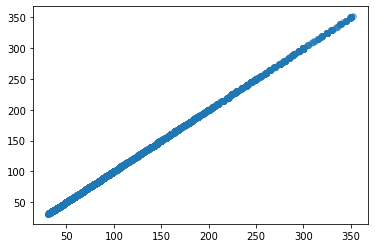

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(trd, trt)
print(lr.score(trd, trt), lr.score(tsd, tst))

tsd_p = lr.predict(tsd)
plt.scatter(tst, tsd_p, alpha=0.4)

# 테스트 데이터로 예측 값과 비교

In [ ]:
t_data = tsd.iloc[:1]
tdp = lr.predict(t_data) # 예측된 가격
real_p = tst.iloc[:1].values # 실제 가격

print(tdp, real_p)

[45.] [45]
